In [50]:
import numpy as np 
import pandas as pd 
import sys

work_dir = sys.path[0]

Load Dataset

In [51]:
data = pd.read_csv(work_dir+"/data/healthcare-dataset-stroke-data.csv")

In [52]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Exploratory analysis

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
print("="*50)
print(" Categorical and Ordinal variables ")
print("="*50)
print("gender \t\t",data.gender.unique())
print("hypertension \t\t",data.hypertension.unique())
print("heart_disease \t",data.heart_disease.unique())
print("ever_married \t\t",data.ever_married.unique())
print("work_type \t\t",data.work_type.unique())
print("Residence_type \t",data.Residence_type.unique())
print("smoking_status \t",data.smoking_status.unique())
print("stroke \t\t",data.stroke.unique(), " yes | no ")
print("="*50)
print(" Numerical variables ")
print("="*50)
print(data.describe())

 Categorical and Ordinal variables 
gender 		 ['Male' 'Female' 'Other']
hypertension 		 [0 1]
heart_disease 	 [1 0]
ever_married 		 ['Yes' 'No']
work_type 		 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type 	 ['Urban' 'Rural']
smoking_status 	 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke 		 [1 0]  yes | no 
 Numerical variables 
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bm

Data cleaning & feature engineering

In [6]:
cleanup_dict = {"gender":{"Male":1,"Female":2,"Other":3},
               "ever_married":{"No":1,"Yes":2},
               "Residence_type":{"Urban":1,"Rural":2},
               "work_type":{'Private':5, 'Self-employed':4, 'Govt_job':3, 'children':2,'Never_worked':1},
               "smoking_status":{'formerly smoked':2, 'never smoked':1, 'smokes':3, 'Unknown':0}
               }

In [7]:
clean_data = data.replace(cleanup_dict)

In [8]:
clean_data.isnull().sum(axis = 0) #NaN values in every column 

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
clean_data.shape[0] # Num of rows

5110

In [10]:
clean_data2 = clean_data.dropna()

In [11]:
clean_data2.shape[0] # Num of rows

4909

In [12]:
print("Number of rows deleted for missing value ",clean_data.shape[0] - clean_data2.shape[0])

Number of rows deleted for missing value  201


In [13]:
clean_data2 = clean_data2.drop(["id"], axis=1)

### Model creation

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [15]:
features = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']

target = ['stroke']

In [16]:
X = pd.DataFrame(clean_data2, columns=features)
Y = pd.DataFrame(clean_data2, columns=target)
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,2,5,1,228.69,36.6,2
2,1,80.0,0,1,2,5,2,105.92,32.5,1
3,2,49.0,0,0,2,5,1,171.23,34.4,3
4,2,79.0,1,0,2,4,2,174.12,24.0,1
5,1,81.0,0,0,2,5,1,186.21,29.0,2


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state = 42)

In [18]:
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(X_test)

In [19]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",accuracy)

Accuracy: 0.9144602851323829


 TN: 1778 | FP: 93 | FN:  75 | TP: 18


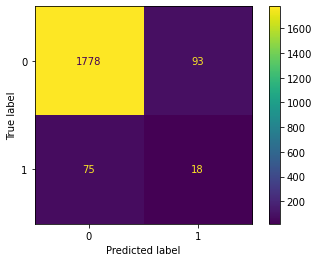

In [20]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
plot_confusion_matrix(model, X_test, y_test)  
print(" TN:",tn,"| FP:", fp,"| FN: ", fn,"| TP:", tp)

In [21]:
clean_data2.iloc[0]

gender                 1.00
age                   67.00
hypertension           0.00
heart_disease          1.00
ever_married           2.00
work_type              5.00
Residence_type         1.00
avg_glucose_level    228.69
bmi                   36.60
smoking_status         2.00
stroke                 1.00
Name: 0, dtype: float64

In [22]:
YES_stroke_record = X.iloc[0]
NO_stroke_record = X.iloc[-1]
print("example of 'no' stroke data: ",Y.iloc[-1],YES_stroke_record)
print("="*50)
print("example of 'yes' stroke data: ",Y.iloc[0],NO_stroke_record)

example of 'no' stroke data:  stroke    0
Name: 5109, dtype: int64 gender                 1.00
age                   67.00
hypertension           0.00
heart_disease          1.00
ever_married           2.00
work_type              5.00
Residence_type         1.00
avg_glucose_level    228.69
bmi                   36.60
smoking_status         2.00
Name: 0, dtype: float64
example of 'yes' stroke data:  stroke    1
Name: 0, dtype: int64 gender                2.00
age                  44.00
hypertension          0.00
heart_disease         0.00
ever_married          2.00
work_type             3.00
Residence_type        1.00
avg_glucose_level    85.28
bmi                  26.20
smoking_status        0.00
Name: 5109, dtype: float64


In [23]:
test_input = {"gender":2,
              "age": 75 ,
              "hypertension": 1,
              "heart_disease" :1,
              "ever_married":1,
              "work_type":5,
              "Residence_type":1,
              "avg_glucose_level":315,
              "bmi":55,
              "smoking_status":2
             }

yes_ = pd.Series(YES_stroke_record).values.reshape(1,-1)
no_ = pd.Series(NO_stroke_record).values.reshape(1,-1)

y_predicted = model.predict(no_)
if y_predicted[0]==0:
    print("no: stroke risk ",round(accuracy*100,2),"%")
else:
    print("yes: stroke risk",round(accuracy*100,2),"%")

no: stroke risk  91.45 %


### Model visualization 

In [53]:
# installation
! pip install graphviz
! pip install pydotplus

OSError: "/usr/bin/zsh" shell not found

In [48]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

ModuleNotFoundError: No module named 'pydotplus'

In [26]:
my_file = StringIO()
export_graphviz(model, out_file=my_file,  
                filled=True, rounded=True,
                special_characters=True,
                feature_names = features,
                class_names=['0','1'])

graph = pydotplus.graph_from_dot_data(my_file.getvalue())  
graph.write_png('stroke.png')
Image(graph.create_png())

NameError: name 'pydotplus' is not defined